***
##Predicting RON 95 prices using Time Series with Window Sliding Schema

***
## Time Series Analysis and Forecasting with Machine Learning (Xgboost)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
from numpy import asarray
from pandas import concat
from pandas import DataFrame
sns.set(rc={'figure.figsize':(15,6)})
%matplotlib inline

## Let's get Started

### Load Dataset


In [32]:
df = pd.read_csv('input/fuelprice.csv')
df.head()

,series_type,date,ron95,ron97,diesel
0,level,30/3/2017,2.13,2.41,2.11
1,level,6/4/2017,2.16,2.43,2.08
2,level,13/4/2017,2.24,2.52,2.16
3,level,20/4/2017,2.27,2.54,2.21
4,level,27/4/2017,2.21,2.49,2.14


In [33]:
df.describe()

,ron95,ron97,diesel
count,333.000000,333.000000,333.000000
mean,2.019129,2.809550,2.094865
std,0.193716,0.692961,0.162573
min,1.250000,1.550000,1.400000
25%,2.050000,2.410000,2.140000
50%,2.050000,2.610000,2.150000
75%,2.080000,3.350000,2.180000
max,2.380000,4.840000,2.340000


In [34]:
df.shape

(333, 5)

<Axes: >

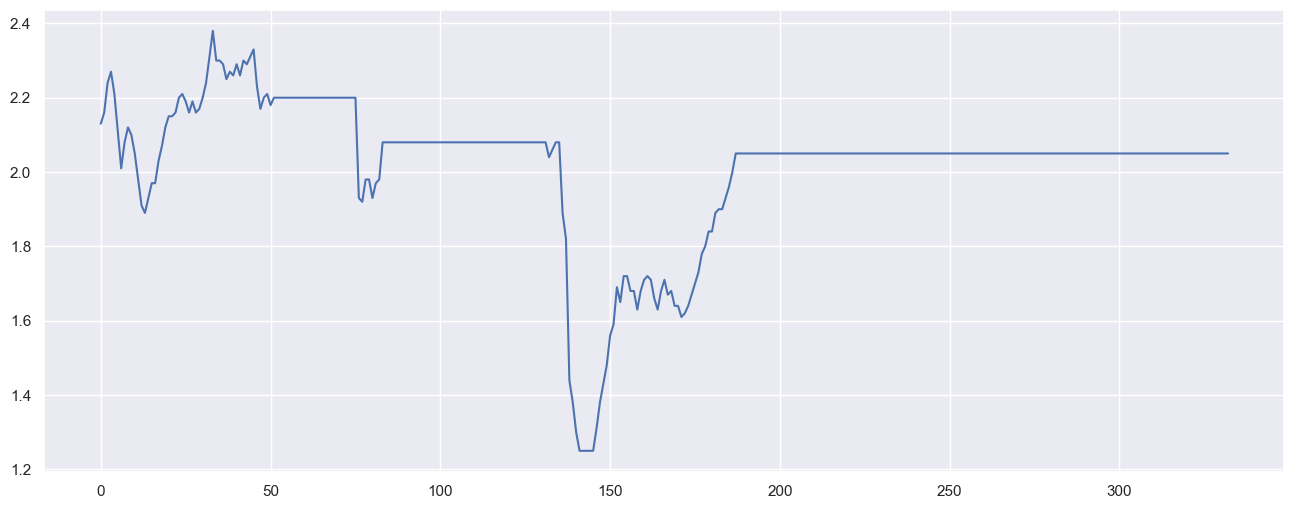

In [35]:
df['ron95'].plot(figsize=(16,6))

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   series_type  333 non-null    object 
 1   date         333 non-null    object 
 2   ron95        333 non-null    float64
 3   ron97        333 non-null    float64
 4   diesel       333 non-null    float64
dtypes: float64(3), object(2)
memory usage: 13.1+ KB


### Rolling Window

This representation is called a sliding window, as the window of inputs and expected outputs is shifted forward through time to create new “samples” for a supervised learning model.

In [47]:
#7-day rolling mean
df['ron95'].rolling(7).mean().head(10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6    2.161429
7    2.154286
8    2.148571
9    2.128571
Name: ron95, dtype: float64

The graphs shows the 7-day windowing steps.

<Axes: >

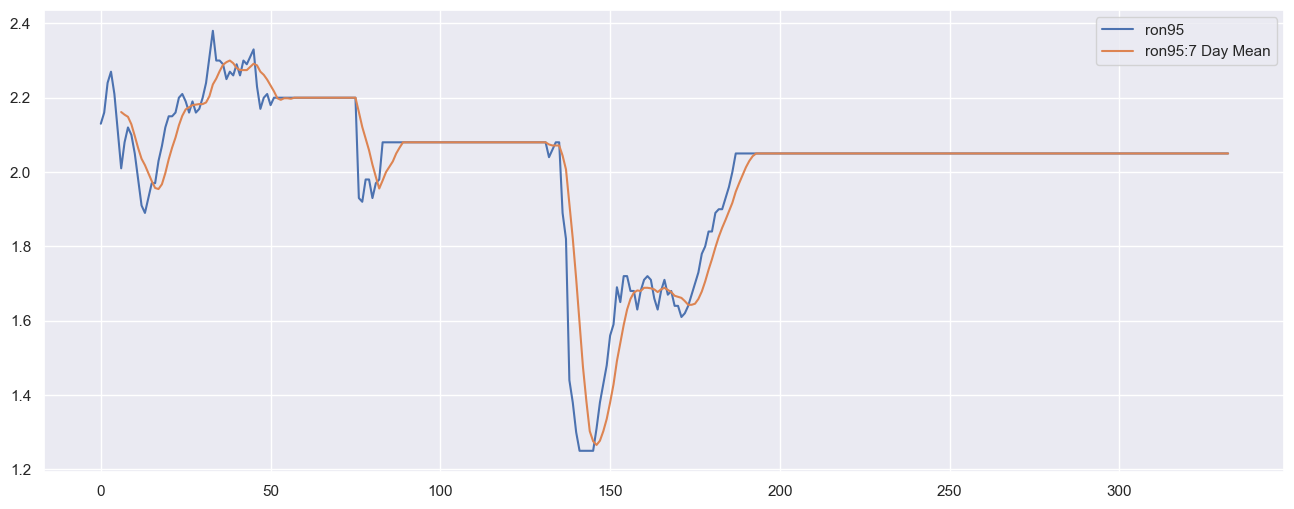

In [46]:
df['ron95:7 Day Mean'] = df['ron95'].rolling(window=7).mean()
df[['ron95','ron95:7 Day Mean']].plot(figsize=(16,6))

The graph below shows 30 day windowing steps.

<Axes: >

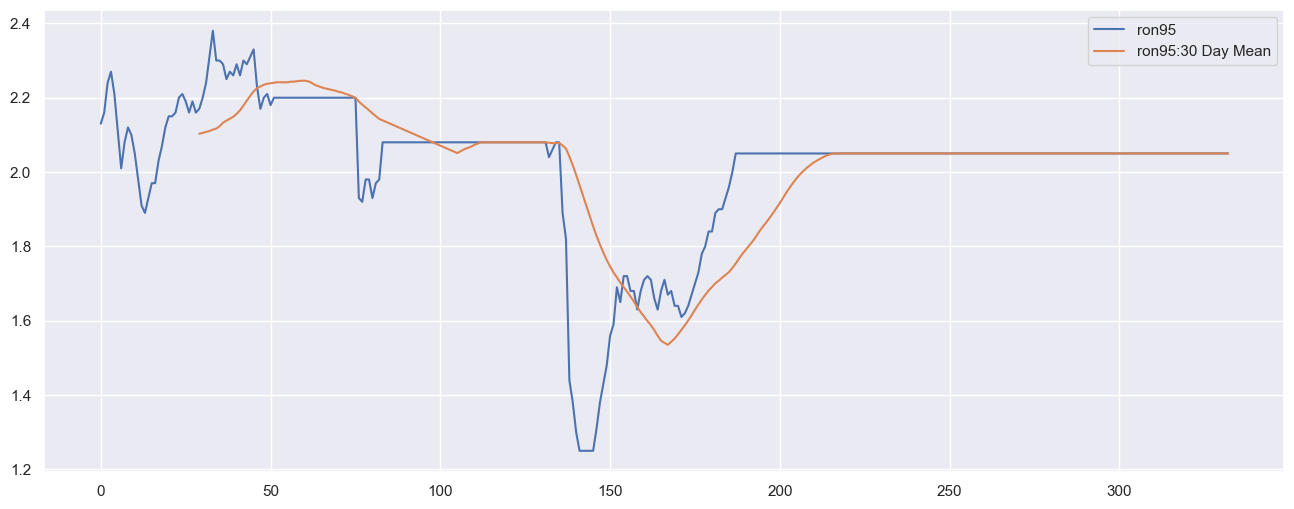

In [44]:
df['ron95:30 Day Mean'] = df['ron95'].rolling(window=30).mean()
df[['ron95','ron95:30 Day Mean']].plot(figsize=(16,6))

In [45]:
#print out sample data after windowing
df

,series_type,date,ron95,ron97,diesel,ron95:7 Day Mean,ron95:30 Day Mean
0,level,30/3/2017,2.13,2.41,2.11,NaN,NaN
1,level,6/4/2017,2.16,2.43,2.08,NaN,NaN
2,level,13/4/2017,2.24,2.52,2.16,NaN,NaN
3,level,20/4/2017,2.27,2.54,2.21,NaN,NaN
4,level,27/4/2017,2.21,2.49,2.14,NaN,NaN
...,...,...,...,...,...,...,...
328,level,9/11/2023,2.05,3.47,2.15,2.05,2.05
329,level,16/11/2023,2.05,3.47,2.15,2.05,2.05
330,level,23/11/2023,2.05,3.47,2.15,2.05,2.05
331,level,30/11/2023,2.05,3.47,2.15,2.05,2.05


In [58]:
#assigning the train, test, label and features.
features = ['ron95:7 Day Mean', 'ron95:30 Day Mean'] #features used
label = 'ron95' # label
test_df = df[df['date'] >= '2021-12-21'] # index for test data
train_df = df[df['date'] < '2021-12-21'] # index for train data

X_train, y_train = train_df[features], train_df[label] #assign train data
X_test, y_test = test_df[features], test_df[label] # assign test data

## Building the Model

For this tutorial, we play around with the learning_rate parameter from Xgboost. 3 different value is adjusted and the performance of the model is observed.

In [63]:
## Xgb with set value learning_rate = 0.01
!pip install xgboost
from xgboost import XGBRegressor

reg1 = XGBRegressor(n_estimators=100, learning_rate=0.01)
reg1.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[0]	validation_0-mae:0.11865	validation_1-mae:0.12047
[1]	validation_0-mae:0.11758	validation_1-mae:0.11950
[2]	validation_0-mae:0.11653	validation_1-mae:0.11855
[3]	validation_0-mae:0.11548	validation_1-mae:0.11760
[4]	validation_0-mae:0.11444	validation_1-mae:0.11666
[5]	validation_0-mae:0.11342	validation_1-mae:0.11573
[6]	validation_0-mae:0.11239	validation_1-mae:0.11481
[7]	validation_0-mae:0.11139	validation_1-mae:0.11390
[8]	validation_0-mae:0.11040	validation_1-mae:0.11299
[9]	validation_0-mae:0.10940	validation_1-mae:0.11208
[10]	validation_0-mae:0.10842	validation_1-mae:0.11120
[11]	validation_0-mae:0.10745	validation_1-mae:0.11032
[12]	validation_0-mae:0.10650	validation_1-mae:0.10945
[13]	validation_0-mae:0.10555	validation_1-mae:0.10858
[14]	validation_0-mae:0.10459	validation_1-mae:0.10772
[15]	validation_0-mae:0.10366	validation_1-mae:0.10687
[16]	validation_0-mae:0.10274	validation_1-mae:0.10604
[17]	validation_0-mae:0.10182	validation_1-mae:0.10521
[18]	validation_0-ma

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[98]	validation_0-mae:0.05026	validation_1-mae:0.05775
[99]	validation_0-mae:0.04983	validation_1-mae:0.05738


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print('MAE: ',metrics.mean_absolute_error(y_test, reg1.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, reg1.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, reg1.predict(X_test))))

MAE:  0.05737933254746529
MSE:  0.009787083264179004
RMSE: 0.09892968848722311


In [66]:
predictions = reg1.predict(X_test)

In [67]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions'] = pd.Series(predictions)

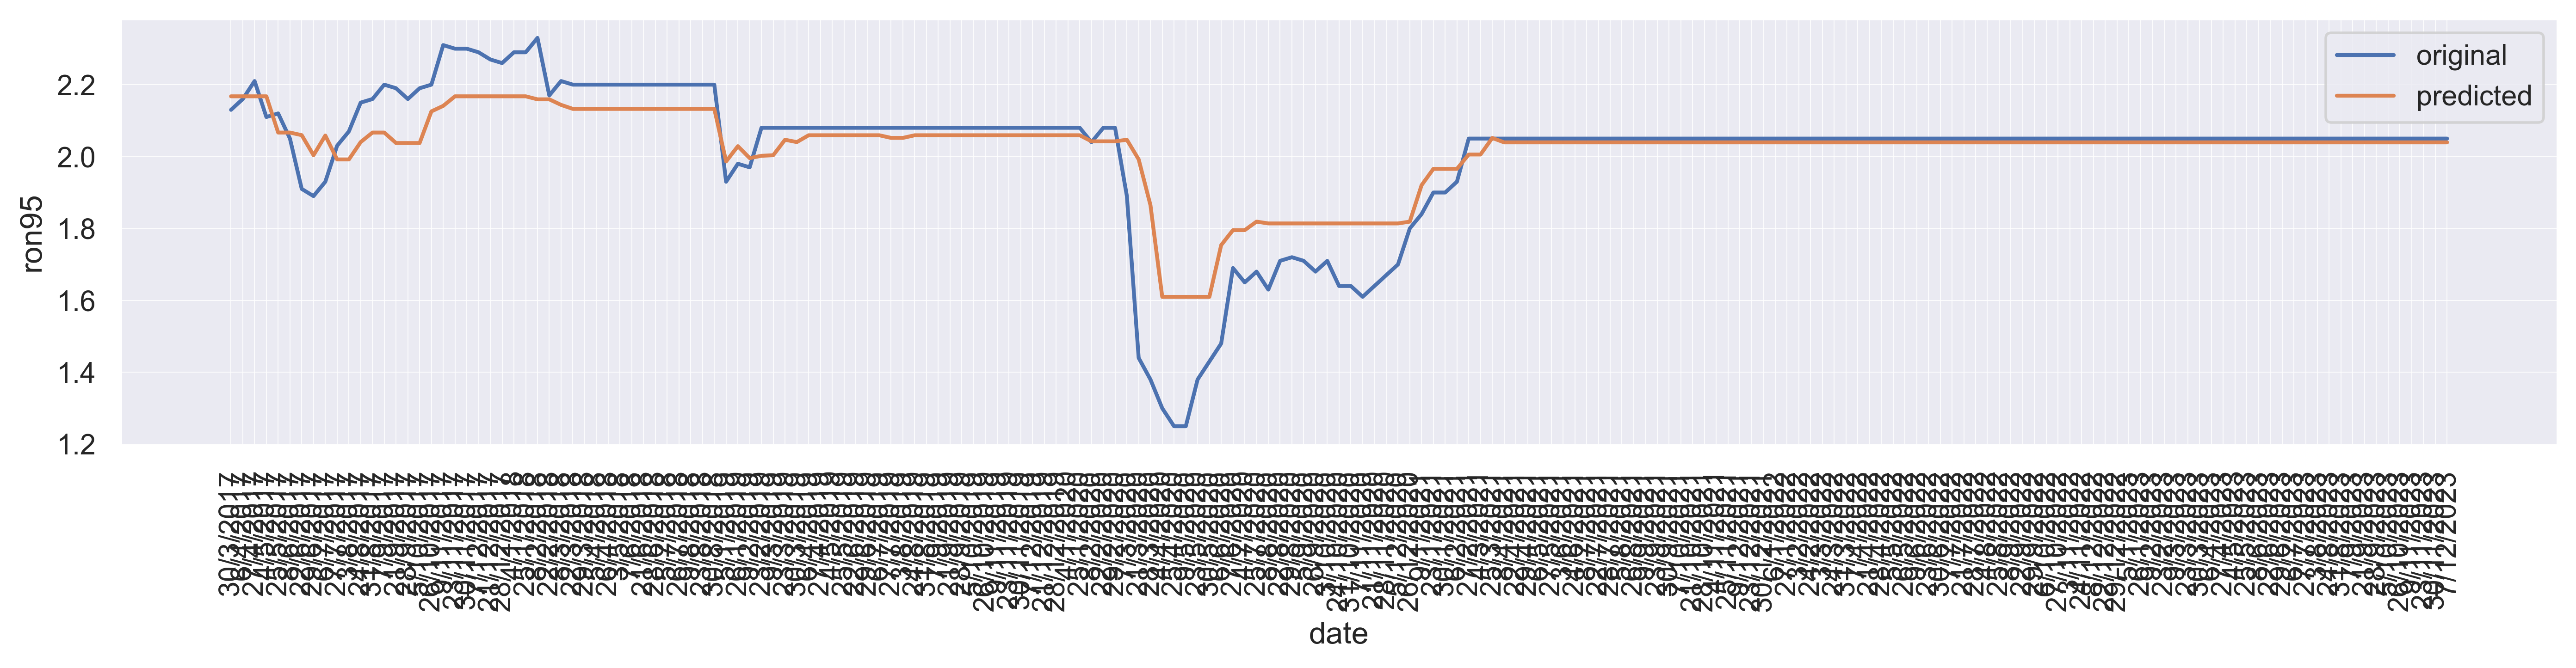

In [68]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':400})
fig, ax = plt.subplots()
#ax.set_xlabel('1882-2020',fontsize = 12)
#sns.lineplot(data=df, x='DATE', y='temperature')
sns.lineplot(data=test_df, x='date', y='ron95', label = 'original')
sns.lineplot(data=test_df, x='date', y='predictions', label = 'predicted')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
## Xgb with set value learning_rate = 0.1
reg2 = XGBRegressor(n_estimators=100, learning_rate=0.1)
reg2.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print('MAE: ',metrics.mean_absolute_error(y_test, reg2.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, reg2.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, reg2.predict(X_test))))

In [ ]:
predictions = reg2.predict(X_test)

In [ ]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions'] = pd.Series(predictions)

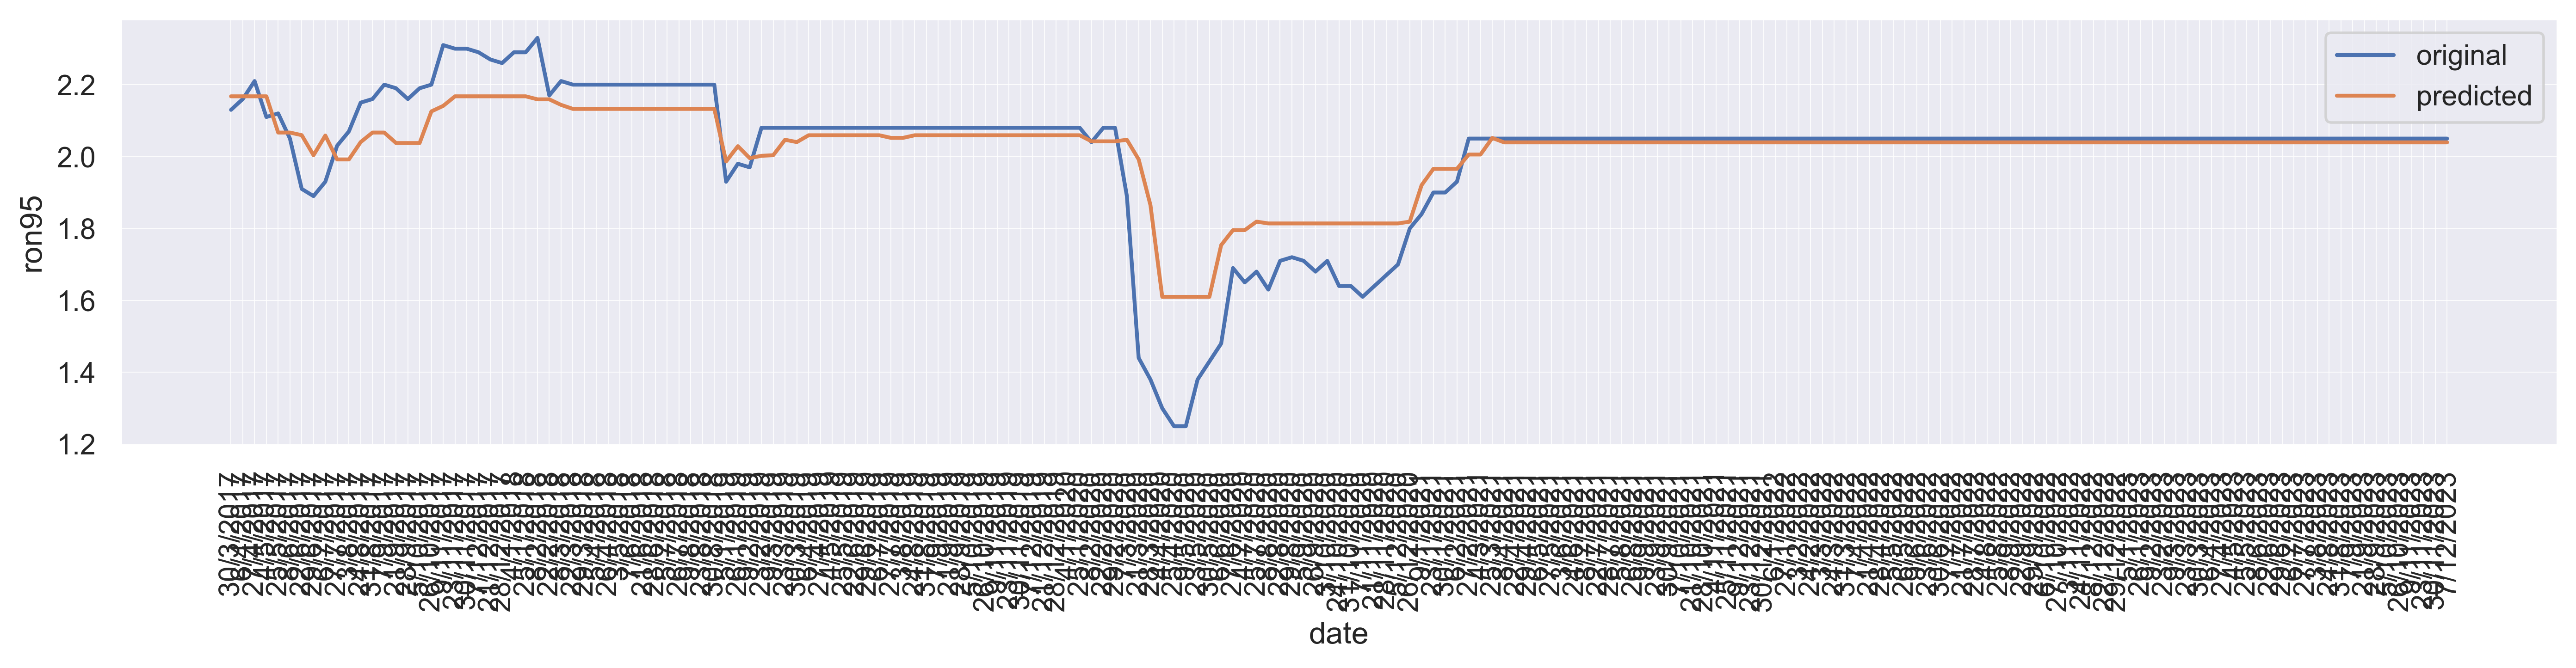

In [69]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':400})
fig, ax = plt.subplots()
#ax.set_xlabel('1882-2020',fontsize = 12)
#sns.lineplot(data=df, x='DATE', y='temperature')
sns.lineplot(data=test_df, x='date', y='ron95', label = 'original')
sns.lineplot(data=test_df, x='date', y='predictions', label = 'predicted')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [70]:
## Xgb with set value learning_rate = 0.3
reg3 = XGBRegressor(n_estimators=100, learning_rate=0.3)
reg3.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[0]	validation_0-mae:0.08752	validation_1-mae:0.09228
[1]	validation_0-mae:0.06439	validation_1-mae:0.07125
[2]	validation_0-mae:0.04810	validation_1-mae:0.05743
[3]	validation_0-mae:0.03579	validation_1-mae:0.04721
[4]	validation_0-mae:0.02677	validation_1-mae:0.03964
[5]	validation_0-mae:0.02039	validation_1-mae:0.03493
[6]	validation_0-mae:0.01579	validation_1-mae:0.03211
[7]	validation_0-mae:0.01215	validation_1-mae:0.03037
[8]	validation_0-mae:0.00981	validation_1-mae:0.02889
[9]	validation_0-mae:0.00806	validation_1-mae:0.02798
[10]	validation_0-mae:0.00670	validation_1-mae:0.02759
[11]	validation_0-mae:0.00553	validation_1-mae:0.02720
[12]	validation_0-mae:0.00461	validation_1-mae:0.02708
[13]	validation_0-mae:0.00399	validation_1-mae:0.02712
[14]	validation_0-mae:0.00343	validation_1-mae:0.02722
[15]	validation_0-mae:0.00297	validation_1-mae:0.02733
[16]	validation_0-mae:0.00264	validation_1-mae:0.02736
[17]	validation_0-mae:0.00239	validation_1-mae:0.02741
[18]	validation_0-ma

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

print('MAE: ',metrics.mean_absolute_error(y_test, reg3.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, reg3.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, reg3.predict(X_test))))

MAE:  0.027549236943482176
MSE:  0.0050107890087526105
RMSE: 0.07078692682093644


In [73]:
predictions = reg3.predict(X_test)

In [74]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions'] = pd.Series(predictions)

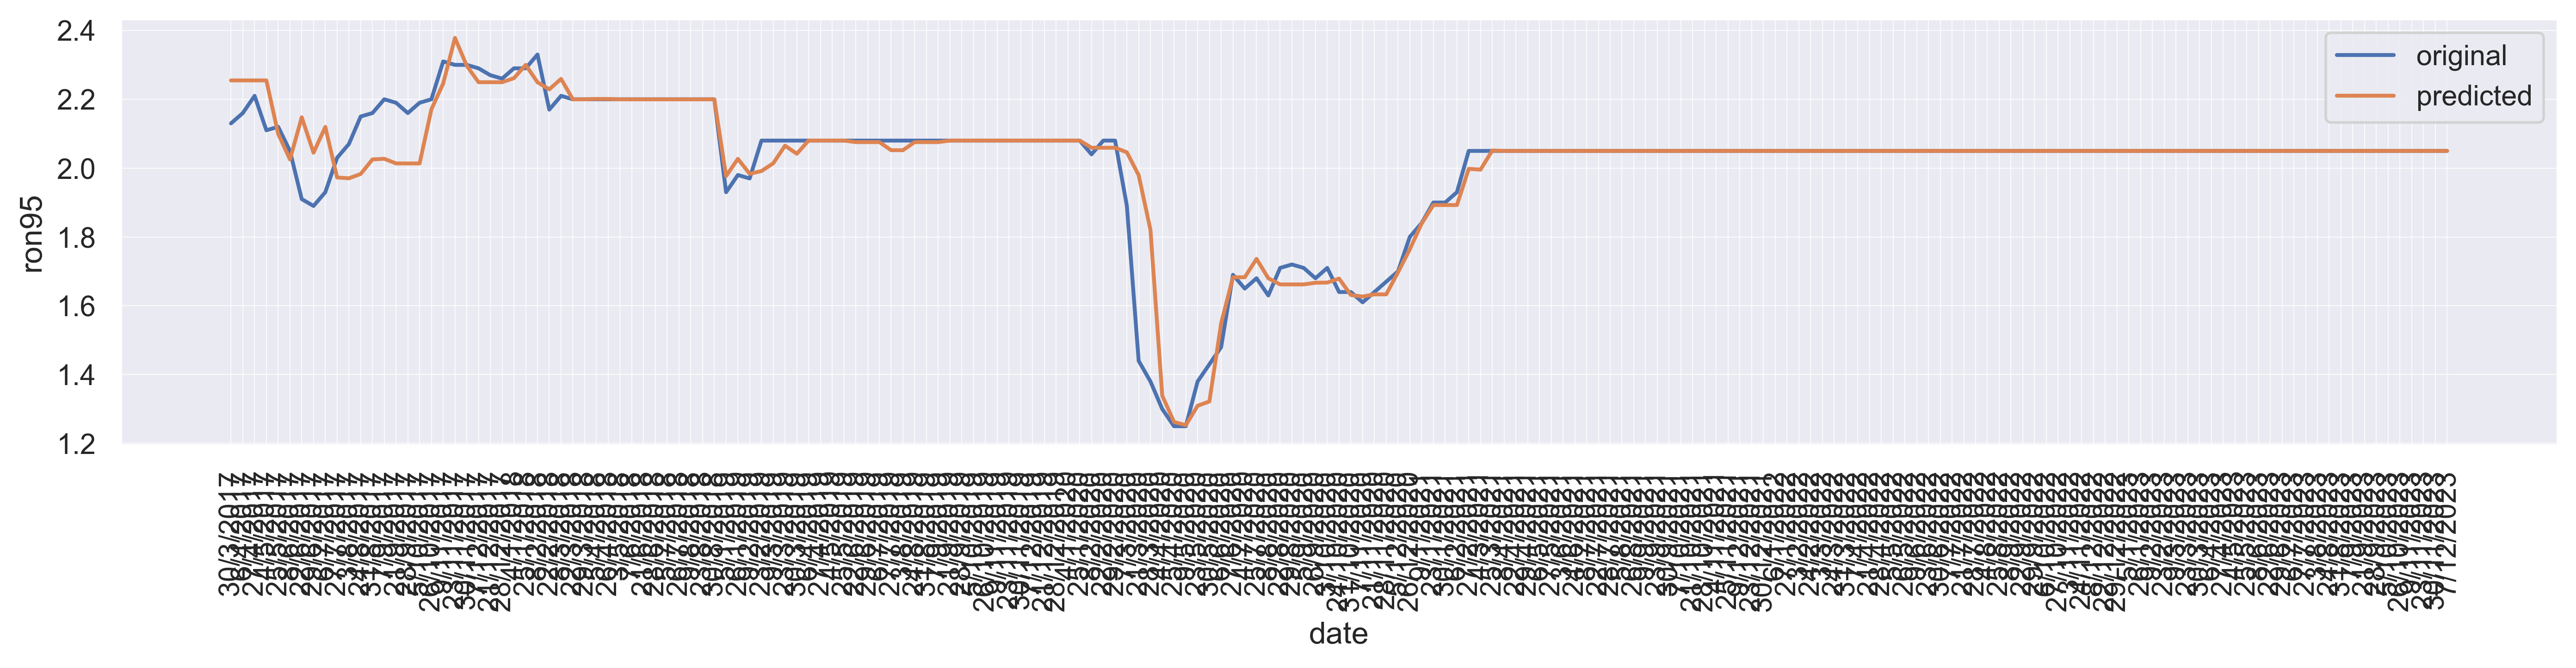

In [75]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':400})
fig, ax = plt.subplots()
#ax.set_xlabel('1882-2020',fontsize = 12)
#sns.lineplot(data=df, x='DATE', y='temperature')
sns.lineplot(data=test_df, x='date', y='ron95', label = 'original')
sns.lineplot(data=test_df, x='date', y='predictions', label = 'predicted')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

## Best Model
Our Best model so far is reg3 with learning rate = 0.3.

Let's plot the graph against the original data, to see how well the data fir to the original data.

In [76]:
predictions = reg3.predict(X_test)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   series_type        333 non-null    object 
 1   date               333 non-null    object 
 2   ron95              333 non-null    float64
 3   ron97              333 non-null    float64
 4   diesel             333 non-null    float64
 5   ron95:7 Day Mean   327 non-null    float64
 6   ron95:30 Day Mean  304 non-null    float64
dtypes: float64(5), object(2)
memory usage: 18.3+ KB


In [78]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions'] = pd.Series(predictions)

In [79]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   series_type        189 non-null    object 
 1   date               189 non-null    object 
 2   ron95              189 non-null    float64
 3   ron97              189 non-null    float64
 4   diesel             189 non-null    float64
 5   ron95:7 Day Mean   185 non-null    float64
 6   ron95:30 Day Mean  172 non-null    float64
 7   predictions        189 non-null    float32
dtypes: float32(1), float64(5), object(2)
memory usage: 11.2+ KB


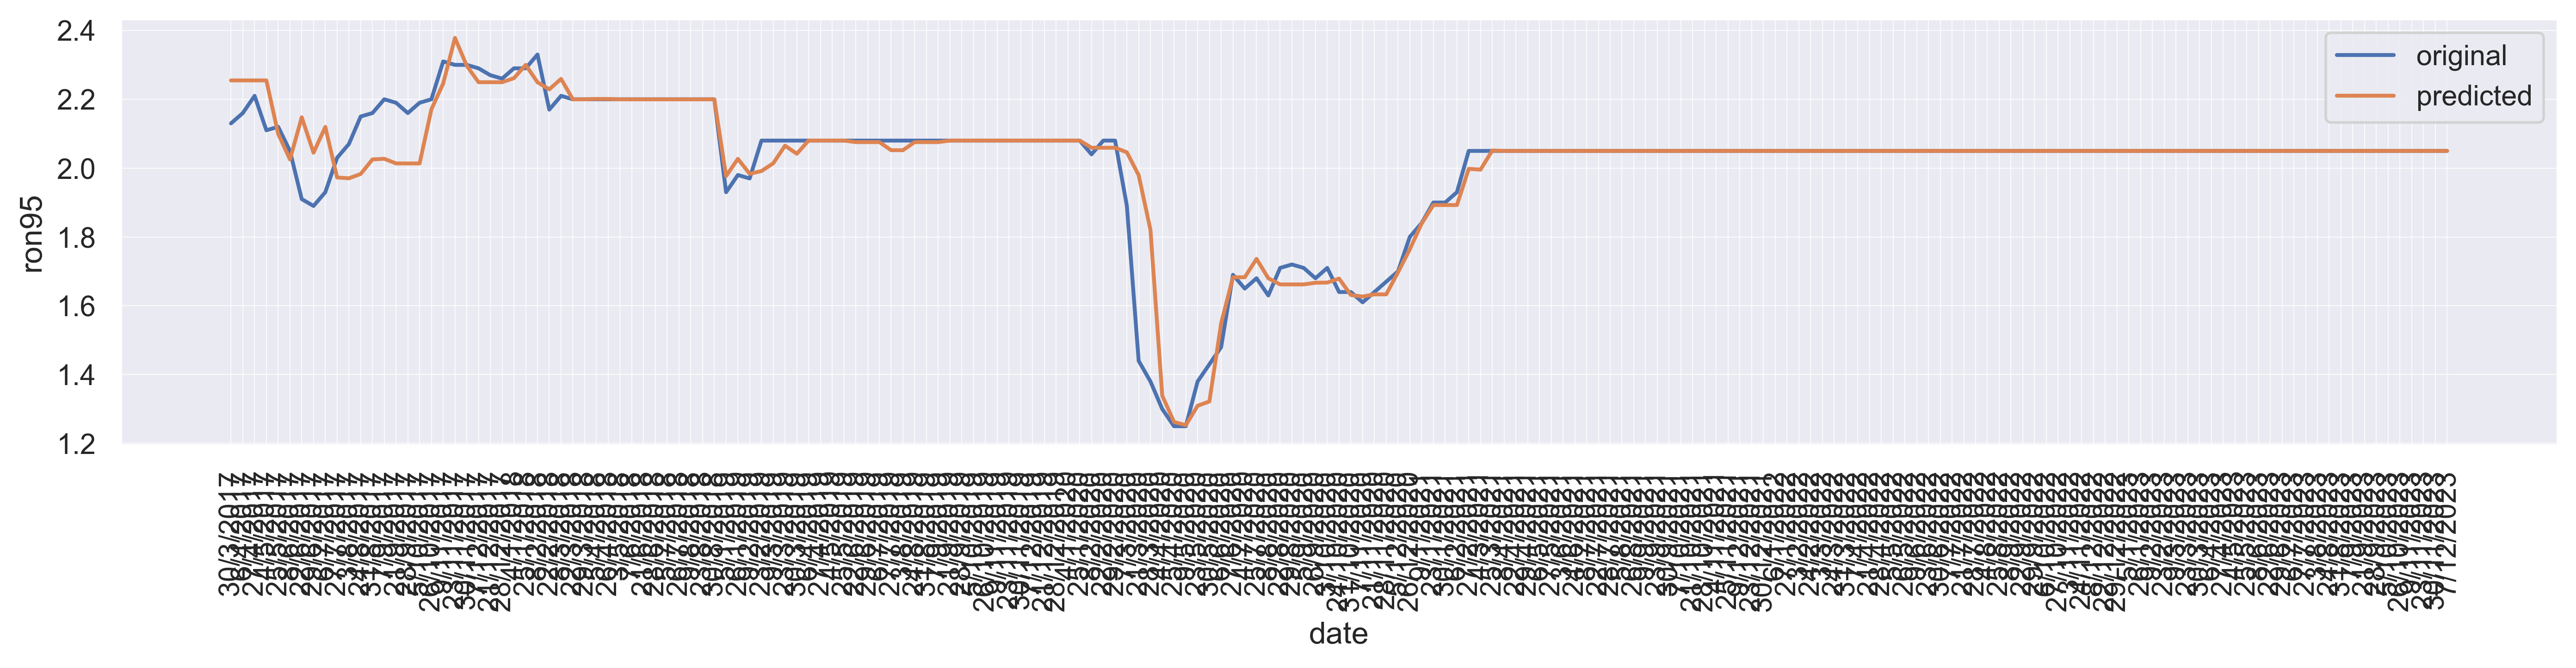

In [82]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':400})
fig, ax = plt.subplots()
#ax.set_xlabel('1882-2020',fontsize = 12)
#sns.lineplot(data=df, x='DATE', y='temperature')
#sns.lineplot(data=df, x='DATE', y='temperature', label = 'original')
#sns.lineplot(data=test_df, x='DATE', y='predictions', label = 'predicted')
#plt.grid(linestyle='-', linewidth=1.0)
#ax.tick_params(axis='x', rotation=90)
sns.lineplot(data=test_df, x='date', y='ron95', label = 'original')
sns.lineplot(data=test_df, x='date', y='predictions', label = 'predicted')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [83]:
test_df

,series_type,date,ron95,ron97,diesel,ron95:7 Day Mean,ron95:30 Day Mean,predictions
0,level,30/3/2017,2.13,2.41,2.11,NaN,NaN,2.254853
1,level,6/4/2017,2.16,2.43,2.08,NaN,NaN,2.254853
2,level,27/4/2017,2.21,2.49,2.14,NaN,NaN,2.254853
3,level,4/5/2017,2.11,2.39,2.08,NaN,NaN,2.254853
4,level,25/5/2017,2.12,2.40,2.03,2.148571,NaN,2.099791
...,...,...,...,...,...,...,...,...
184,level,26/10/2023,2.05,3.47,2.15,2.050000,2.05,2.050003
185,level,9/11/2023,2.05,3.47,2.15,2.050000,2.05,2.050003
186,level,23/11/2023,2.05,3.47,2.15,2.050000,2.05,2.050003
187,level,30/11/2023,2.05,3.47,2.15,2.050000,2.05,2.050003


## Forecast of time series

Now since we have finalized our model, lets proceed with the prediction. We are going to use the value of Xgboost parameter (n_estimators=100, learning_rate=0.3) and build a forecast of time series.

In [84]:
#This step define function used to transform a time series dataset into a supervised learning dataset.
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=2, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[0]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [86]:
# Since we have build the model, in this stage we are going to use the whole set of data again, but only select the temperature column. 
#This is because we only want to do forecasting on the temperature column.
values = df.ron95.values #select column temperature.
preds = [] 
# this define the number of forecasting that we want. 10 indicates 10 new value will be forecasted. You can change it accordingly.
for i in range(10): 
    # transform the time series data into supervised learning. n_in=6 meaning you are using the first 6 value to forecast the value ahead
    forecast = series_to_supervised(values, n_in=6)
    # split into input and output columns
    forecastI, forecastO = forecast[:, :-1], forecast[:, -1]
    # fit model. Took back the value the we built before.
    model = XGBRegressor(n_estimators=100, learning_rate=0.3)
    model.fit(forecastI, forecastO)
    # construct an input for a new prediction
    row = values[-6:].flatten()
    # make a prediction
    yhat = model.predict(asarray([row]))
    print('Input: %s, Forecast: %.3f' % (row, yhat[0]))
    values = np.append(values, yhat)
    preds.append(yhat)

Input: [2.05 2.05 2.05 2.05 2.05 2.05], Forecast: 2.050
Input: [2.05       2.05       2.05       2.05       2.05       2.04999781], Forecast: 2.050
Input: [2.05       2.05       2.05       2.05       2.04999781 2.04999781], Forecast: 2.050
Input: [2.05       2.05       2.05       2.04999781 2.04999781 2.04999781], Forecast: 2.050
Input: [2.05       2.05       2.04999781 2.04999781 2.04999781 2.04973316], Forecast: 2.010
Input: [2.05       2.04999781 2.04999781 2.04999781 2.04973316 2.01008177], Forecast: 2.019
Input: [2.04999781 2.04999781 2.04999781 2.04973316 2.01008177 2.01899076], Forecast: 2.015
Input: [2.04999781 2.04999781 2.04973316 2.01008177 2.01899076 2.01532698], Forecast: 2.005
Input: [2.04999781 2.04973316 2.01008177 2.01899076 2.01532698 2.00496364], Forecast: 1.996
Input: [2.04973316 2.01008177 2.01899076 2.01532698 2.00496364 1.99636412], Forecast: 1.916


## Conclusion
- For machine learning time series, there are still some improvement can be done.
- You are free to try and explore other available machine learning algorithm and see the difference. :)
- As of now, some limitation with windowing, its quite difficult to do forecasting as mostly we have to transform to a supervised form. Feel free to explore and try other option if any.

Happy learning and hope you enjoy time series. :)

## Additional materials to explore:
- https://towardsdatascience.com/ml-approaches-for-time-series-4d44722e48fe
- https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/